In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from water_properties import density, enthalpy, heat_capacity, conductivity, viscosity

In [2]:
def simplified_model_for_fit(x, a00, a01, a02, a10, a11, a12, a20, a21, a22):
    
    c = [[a00, a01, a02],[a10, a11, a12],[a20, a21, a22]] 
    
    T, P = x
    
    return simplified_model(T, P, c)

In [3]:
def simplified_model(T, P, c):
    
    return np.polynomial.polynomial.polyval2d(T, P, c)

In [4]:
def calculate_output(func,X1,X2,*args):
    Z = np.zeros_like(X1)
    for i in range(X1.shape[0]):                     
        for j in range(X2.shape[1]):
            Z[i,j] = func(X1[i,j],X2[i,j],*args)[0]
    return Z

In [5]:
limits = [293., 353., 10000., 1000000.]
npoints = 100
T = np.linspace(limits[0], limits[1], npoints)
P = np.linspace(limits[2], limits[3], npoints)
X1, X2 = np.meshgrid(T, P)


In [6]:
def fit(model, X1, X2):
    Z = calculate_output(model,X1,X2)
    size = X1.shape
    x1_1d = X1.reshape((1, np.prod(size)))
    x2_1d = X2.reshape((1, np.prod(size)))
    z_1d = Z.reshape((1, np.prod(size)))

    xdata = np.vstack((x1_1d, x2_1d))
    ydata = z_1d[0]
    popt, pcov = curve_fit(simplified_model_for_fit, xdata, ydata)
    
    c = popt.reshape((3,3))
    
    Z_fit = simplified_model(X1,X2,c)
    
    z_fit_1d = Z_fit.reshape((1, np.prod(size)))
    
    # residual sum of squares
    ss_res = np.sum((z_1d[0] - z_fit_1d[0]) ** 2)

    # total sum of squares
    ss_tot = np.sum((z_1d[0] - np.mean(z_1d[0])) ** 2)

    # r-squared
    r2 = 1 - (ss_res / ss_tot)
    
    return (c, Z_fit, Z, r2)

In [7]:
def plot_result(name, X1, X2, Z, Z_fit):
    
    plt.subplot(1, 2, 1)
    plt.title("Real {0}".format(name))
    plt.pcolormesh(X1, X2, Z)
    plt.axis(limits)
    plt.colorbar()
    plt.subplot(1, 2, 2)
    plt.title("Fitted {0}".format(name))
    plt.pcolormesh(X1, X2, Z_fit)
    plt.axis(limits)
    plt.colorbar()
    plt.show()

DENSITY


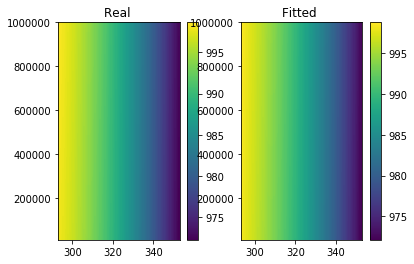

Parameters: [[ 7.79090743e+02  2.48303614e-06 -1.72867793e-14]
 [ 1.73778137e+00 -1.25464465e-08  1.06919245e-16]
 [-3.37696769e-03  1.92123247e-11 -1.69246313e-19]]
R2: 0.9999480326363144


In [8]:
print("DENSITY")
c, Z_fit, Z, r2 = fit(density, X1, X2)
plot_result("", X1, X2, Z, Z_fit)
print("Parameters:",c)
print("R2:", r2)
c_dict = dict()
c_dict['density'] = c

ENTHALPY


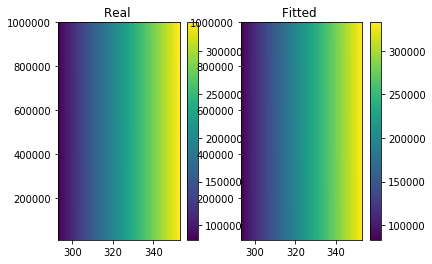

Parameters: [[-1.13179941e+06  2.33827218e-03 -2.06860245e-11]
 [ 4.11846511e+03 -6.75337539e-06  1.19007291e-13]
 [ 9.80972572e-02  6.76532230e-09 -1.71417931e-16]]
R2: 0.9999999527959013


In [9]:
print("ENTHALPY")
c, Z_fit, Z, r2 = fit(enthalpy, X1, X2)
plot_result("", X1, X2, Z, Z_fit)
print("Parameters:",c)
print("R2:", r2)
c_dict['enthalpy'] = c

VISCOSITY


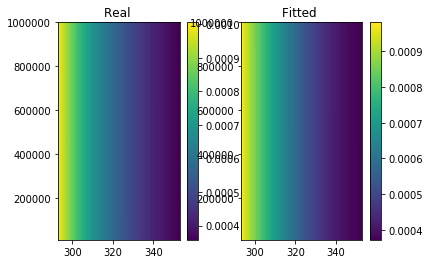

Parameters: [[ 1.88609725e-02 -2.70404394e-11  1.05272925e-19]
 [-1.03228185e-04  1.60840574e-13 -6.17146995e-22]
 [ 1.44044684e-07 -2.36804252e-16  9.04800488e-25]]
R2: 0.9981413384859136


In [10]:
print("VISCOSITY")
c, Z_fit, Z, r2 = fit(viscosity, X1, X2)
plot_result("", X1, X2, Z, Z_fit)
print("Parameters:",c)
print("R2:", r2)
c_dict['viscosity'] = c

HEAT CAPACITY


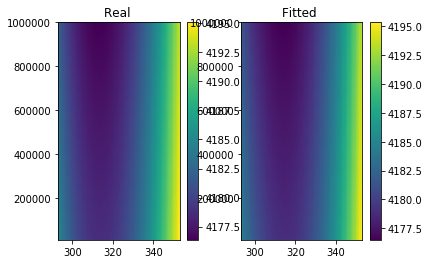

Parameters: [[ 5.33854120e+03 -4.59622909e-05  6.92912051e-13]
 [-7.36540443e+00  2.56423946e-07 -4.16832999e-15]
 [ 1.16954320e-02 -3.75497945e-10  6.31920830e-18]]
R2: 0.9985874314877093


In [11]:
print("HEAT CAPACITY")
c, Z_fit, Z, r2 = fit(heat_capacity, X1, X2)
plot_result("", X1, X2, Z, Z_fit)
print("Parameters:",c)
print("R2:", r2)
c_dict['heat_capacity'] = c

CONDUCTIVITY


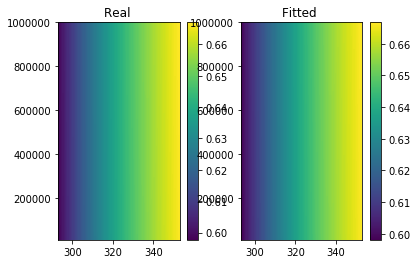

Parameters: [[-6.68466623e-01  5.60495502e-09 -9.47189764e-17]
 [ 6.96267417e-03 -3.08101787e-11  5.75613760e-19]
 [-9.01035342e-06  4.66554489e-14 -8.77655266e-22]]
R2: 0.9999601968654405


In [12]:
print("CONDUCTIVITY")
c, Z_fit, Z, r2 = fit(conductivity, X1, X2)
plot_result("", X1, X2, Z, Z_fit)
print("Parameters:",c)
print("R2:", r2)
c_dict['conductivity'] = c

In [13]:
import pprint
pprint.pprint(c_dict)

{'conductivity': array([[-6.68466623e-01,  5.60495502e-09, -9.47189764e-17],
       [ 6.96267417e-03, -3.08101787e-11,  5.75613760e-19],
       [-9.01035342e-06,  4.66554489e-14, -8.77655266e-22]]),
 'density': array([[ 7.79090743e+02,  2.48303614e-06, -1.72867793e-14],
       [ 1.73778137e+00, -1.25464465e-08,  1.06919245e-16],
       [-3.37696769e-03,  1.92123247e-11, -1.69246313e-19]]),
 'enthalpy': array([[-1.13179941e+06,  2.33827218e-03, -2.06860245e-11],
       [ 4.11846511e+03, -6.75337539e-06,  1.19007291e-13],
       [ 9.80972572e-02,  6.76532230e-09, -1.71417931e-16]]),
 'heat_capacity': array([[ 5.33854120e+03, -4.59622909e-05,  6.92912051e-13],
       [-7.36540443e+00,  2.56423946e-07, -4.16832999e-15],
       [ 1.16954320e-02, -3.75497945e-10,  6.31920830e-18]]),
 'viscosity': array([[ 1.88609725e-02, -2.70404394e-11,  1.05272925e-19],
       [-1.03228185e-04,  1.60840574e-13, -6.17146995e-22],
       [ 1.44044684e-07, -2.36804252e-16,  9.04800488e-25]])}
